In [1]:
import numpy as np
import pandas as pd
import os
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly import tools
init_notebook_mode(connected=True)  
import plotly.figure_factory as ff

In [2]:
players = pd.read_csv('Players.csv')
players.head(10)

,Unnamed: 0,Player,height,weight,collage,born,birth_city,birth_state
0,0,Curly Armstrong,180.0,77.0,Indiana University,1918.0,NaN,NaN
1,1,Cliff Barker,188.0,83.0,University of Kentucky,1921.0,Yorktown,Indiana
2,2,Leo Barnhorst,193.0,86.0,University of Notre Dame,1924.0,NaN,NaN
3,3,Ed Bartels,196.0,88.0,North Carolina State University,1925.0,NaN,NaN
4,4,Ralph Beard,178.0,79.0,University of Kentucky,1927.0,Hardinsburg,Kentucky
5,5,Gene Berce,180.0,79.0,Marquette University,1926.0,NaN,NaN
6,6,Charlie Black,196.0,90.0,University of Kansas,1921.0,Arco,Idaho
7,7,Nelson Bobb,183.0,77.0,Temple University,1924.0,Philadelphia,Pennsylvania
8,8,Jake Bornheimer,196.0,90.0,Muhlenberg College,1927.0,New Brunswick,New Jersey
9,9,Vince Boryla,196.0,95.0,University of Denver,1927.0,East Chicago,Indiana


In [3]:
players_data = pd.read_csv('player_data.csv')
players_data.head()

,name,year_start,year_end,position,height,weight,birth_date,college
0,Alaa Abdelnaby,1991,1995,F-C,6-10,240.0,"June 24, 1968",Duke University
1,Zaid Abdul-Aziz,1969,1978,C-F,6-9,235.0,"April 7, 1946",Iowa State University
2,Kareem Abdul-Jabbar,1970,1989,C,7-2,225.0,"April 16, 1947","University of California, Los Angeles"
3,Mahmoud Abdul-Rauf,1991,2001,G,6-1,162.0,"March 9, 1969",Louisiana State University
4,Tariq Abdul-Wahad,1998,2003,F,6-6,223.0,"November 3, 1974",San Jose State University


In [4]:
final_df = pd.read_csv('Seasons_Stats.csv')
final_df.head()

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,...,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,...,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,...,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,...,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,...,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0


In [5]:
players_data.rename(columns={'name': 'Player'}, inplace=True)

In [6]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

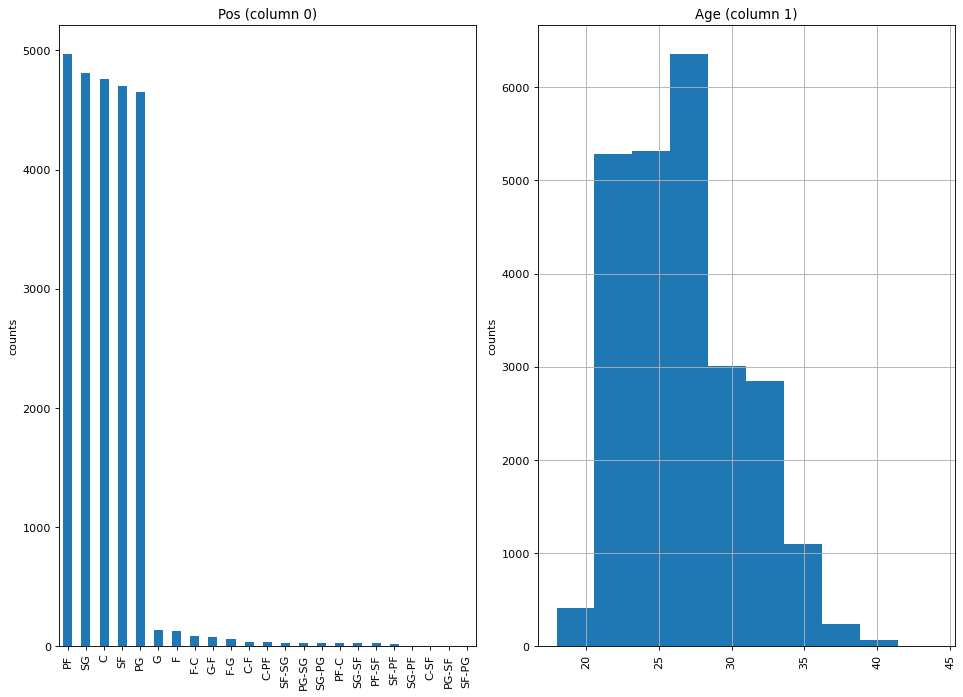

In [7]:
plotPerColumnDistribution(final_df, 84, 10)

In [8]:
import random
def random_colors(number_of_colors):
    color = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
                 for i in range(number_of_colors)]
    return color

In [9]:
final_df['ppg'] = final_df.PTS/final_df.G

In [10]:
ppg = pd.DataFrame()
ppg['player'] = final_df.groupby('Player').mean()['ppg'].index
ppg['PPG'] = final_df.groupby('Player').mean()['ppg'].values
ppg= ppg.sort_values('PPG', ascending = False).head(10)

# Points Per Game (PPG)

 # Assists per game (APG)

In [11]:
trace0 = go.Bar(
    x=ppg['player'].head(10),
    y=ppg['PPG'].head(10),
    marker=dict(
        color=random_colors(10),
    ),
    opacity=0.6
)
data=[trace0]
layout = go.Layout(
    title='Top 10 players with Highest Points per game',
)
fig=go.Figure(data=data, layout=layout)
py.iplot(fig, filename='text-hover-bar')

In [12]:
# Creates and style traces
trace0 = go.Scatter(
    x = final_df.Year[final_df.Player == 'Wilt Chamberlain*'],
    y = final_df.ppg[final_df.Player == 'Wilt Chamberlain*'],
    name = 'Wilt Chamberlain',
    connectgaps=True,
    line = dict(
        color = ('rgb(0, 255, 155)'),
        width = 4)
)
trace1 = go.Scatter(
    x = final_df.Year[final_df.Player == 'Michael Jordan*'],
    y = final_df.ppg[final_df.Player == 'Michael Jordan*'],
    name = 'Michael Jordan',
    connectgaps=True,
    line = dict(
        color = ('rgb(22, 96, 167)'),
        width = 4,)
)
trace2 = go.Scatter(
    x = final_df.Year[final_df.Player == 'LeBron James'],
    y = final_df.ppg[final_df.Player == 'LeBron James'],
    name = 'LeBron James',
    connectgaps=True,
    line = dict(
        color = ('rgb(205, 120, 24)'),
        width = 4,
        dash = 'dash') # dash options include 'dash', 'dot', and 'dashdot'
)
trace3 = go.Scatter(
    x = final_df.Year[final_df.Player == 'Kevin Durant'],
    y = final_df.ppg[final_df.Player == 'Kevin Durant'],
    name = 'Kevin Durant',
    connectgaps=True,
    line = dict(
        color = ('rgb(122, 96, 167)'),
        width = 4,
        dash = 'dash')
)
trace4 = go.Scatter(
    x = final_df.Year[final_df.Player == 'Jerry West*'],
    y = final_df.ppg[final_df.Player == 'Jerry West*'],
    name = 'Jerry West',
    connectgaps=True,
    line = dict(
        color = ('rgb(255, 12, 24)'),
        width = 4,
        dash = 'dot')
)
trace5 = go.Scatter(
    x = final_df.Year[final_df.Player == 'George Gervin*'],
    y = final_df.ppg[final_df.Player == 'George Gervin*'],
    name = 'George Gervin',
    connectgaps=True,
    line = dict(
        color = ('rgb(222, 120, 167)'),
        width = 4,
        dash = 'dot')
)
trace6 = go.Scatter(
    x = final_df.Year[final_df.Player == 'Bob Pettit'],
    y = final_df.ppg[final_df.Player == 'Bob Pettit'],
    name = 'Bob Pettit',
    connectgaps=True,
    line = dict(
        color = ('rgb(222, 196, 167)'),
        width = 4,
        dash = 'dot')
)
trace7 = go.Scatter(
    x = final_df.Year[final_df.Player == 'Oscar Robertson*'],
    y = final_df.ppg[final_df.Player == 'Oscar Robertson*'],
    name = 'Oscar Robertson',
    connectgaps=True,
    line = dict(
        color = ('rgb(212, 25, 167)'),
        width = 4,
        dash = 'dot')
)
data1 = [trace0, trace1, trace2, trace3, trace4, trace5, trace6, trace7]

# Edit the layout
layout = dict(title = 'Points per game for Top players',
              xaxis = dict(title = 'Year'),
              yaxis = dict(title = 'PPG'),
              )

fig = dict(data=data1, layout=layout)
py.iplot(fig, filename='styled-line')


# Assists per Game

In [15]:
final_df['apg'] = final_df.AST/final_df.G

In [16]:
apg = pd.DataFrame()
apg['player'] = final_df.groupby('Player').mean()['apg'].index
apg['APG'] = final_df.groupby('Player').mean()['apg'].values
apg = apg.sort_values('APG', ascending=False).head(10)

In [17]:
trace0 = go.Bar(
    x=apg['player'].head(10),
    y=apg['APG'].head(10),
    marker=dict(
        color=random_colors(10),
    ),
    opacity =0.6
)

data =[trace0]
layout=go.Layout(
    title="Top ten players with highest assists per game",
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='text-hover-bar')

In [35]:
trace0 = go.Scatter(
    x = final_df.Year[final_df.Player == 'Magic Johnson*'],
    y = final_df.apg[final_df.Player == 'Magic Johnson*'],
    name = 'Magic Johnson',
    connectgaps=True,
    line = dict(
        color = ('rgb(255, 11, 0)'),
        width = 4)
)
trace1 = go.Scatter(
    x = final_df.Year[final_df.Player == 'John Stockton*'],
    y = final_df.apg[final_df.Player == 'John Stockton*'],
    name = 'John Stockton',
    connectgaps=True,
    line = dict(
        color = ('rgb(22, 96, 167)'),
        width = 4,)
)
trace2 = go.Scatter(
    x = final_df.Year[final_df.Player == 'Oscar Robertson*'],
    y = final_df.apg[final_df.Player == 'Oscar Robertson*'],
    name = 'Oscar Robertson',
    connectgaps=True,
    line = dict(
        color = ('rgb(205, 12, 24)'),
        width = 4,
        dash = 'dash') # dash options include 'dash', 'dot', and 'dashdot'
)
trace3 = go.Scatter(
    x = final_df.Year[final_df.Player == 'Chris Paul'],
    y = final_df.apg[final_df.Player == 'Chris Paul'],
    name = 'Chris Paul',
    connectgaps=True,
    line = dict(
        color = ('rgb(122, 196, 167)'),
        width = 4,
        dash = 'dash')
)
trace4 = go.Scatter(
    x = final_df.Year[final_df.Player == 'Isiah Thomas*'],
    y = final_df.apg[final_df.Player == 'Isiah Thomas*'],
    name = 'Isiah Thomas',
    connectgaps=True,
    line = dict(
        color = ('rgb(225, 222, 0)'),
        width = 4,
        dash = 'dot')
)
trace5 = go.Scatter(
    x = final_df.Year[final_df.Player == 'John Wall'],
    y = final_df.apg[final_df.Player == 'John Wall'],
    name = 'John Wall',
    connectgaps=True,
    line = dict(
        color = ('rgb(22, 225, 167)'),
        width = 4,
        dash = 'dot')
)
trace6 = go.Scatter(
    x = final_df.Year[final_df.Player == 'Jason Kidd'],
    y = final_df.apg[final_df.Player == 'Jason Kidd'],
    name = 'Jason Kidd',
    connectgaps=True,
    line = dict(
        color = ('rgb(222, 96, 167)'),
        width = 4,
        dash = 'dot')
)
trace7 = go.Scatter(
    x = final_df.Year[final_df.Player == 'Rajon Rondo'],
    y = final_df.apg[final_df.Player == 'Rajon Rondo'],
    name = 'Rajon Rondo',
    connectgaps=True,
    line = dict(
        color = ('rgb(12, 6, 67)'),
        width = 4,
        dash = 'dot')
)
data = [trace0, trace1, trace2, trace3, trace4, trace5, trace6, trace7]

# Edit the layout
layout = dict(title = 'Assists per game for Top players',
              xaxis = dict(title = 'Year'),
              yaxis = dict(title = 'APG'),
              )

fig = dict(data=data, layout=layout)
py.iplot(fig, filename='styled-line')

# Field Goals per game

In [36]:
final_df['fgpg'] = final_df['FG']/final_df.G

In [37]:
fgpg = pd.DataFrame()
fgpg['player'] = final_df.groupby('Player').mean()['fgpg'].index
fgpg['FGPG'] = final_df.groupby('Player').mean()['fgpg'].values
fgpg= fgpg.sort_values('FGPG', ascending = False).head(10)

In [38]:
trace0 = go.Bar(
    x=fgpg['player'].head(10),
    y=fgpg['FGPG'].head(10),
    marker=dict(
        color= random_colors(10),
       
        
    ),
    opacity=0.6
)

data = [trace0]
layout = go.Layout(
    title='Top ten players with high field goal per game',
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='text-hover-bar')

In [47]:
trace0 = go.Scatter(
    x = final_df.Year[final_df.Player == 'Wilt Chamberlain*'],
    y = final_df.fgpg[final_df.Player == 'Wilt Chamberlain*'],
    name = 'Wilt Chamberlain',
    connectgaps=True,
    line = dict(
        color = ('rgb(0, 255, 155)'),
        width = 4)
)
trace1 = go.Scatter(
    x = final_df.Year[final_df.Player == 'Michael Jordan*'],
    y = final_df.fgpg[final_df.Player == 'Michael Jordan*'],
    name = 'Michael Jordan',
    connectgaps=True,
    line = dict(
        color = ('rgb(22, 96, 167)'),
        width = 4,)
)
trace2 = go.Scatter(
    x = final_df.Year[final_df.Player == 'George Gervin*'],
    y = final_df.fgpg[final_df.Player == 'George Gervin*'],
    name = 'George Gervin',
    connectgaps=True,
    line = dict(
        color = ('rgb(205, 112, 24)'),
        width = 4,
        dash = 'dash') 
)
trace3 = go.Scatter(
    x = final_df.Year[final_df.Player == 'Kareem Abdul-Jabbar*'],
    y = final_df.fgpg[final_df.Player == 'Kareem Abdul-Jabbar*'],
    name = 'Kareem Abdul-Jabbar',
    connectgaps=True,
    line = dict(
        color = ('rgb(255, 12, 24)'),
        width = 4,
        dash = 'dash')
)
trace4 = go.Scatter(
    x = final_df.Year[final_df.Player == 'LeBron James'],
    y = final_df.fgpg[final_df.Player == 'LeBron James'],
    name = 'LeBron James ',
    connectgaps=True,
    line = dict(
        color = ('rgb(205, 12, 24)'),
        width = 4,
        dash = 'dot')
)
trace5 = go.Scatter(
    x = final_df.Year[final_df.Player == 'Jerry West*'],
    y = final_df.fgpg[final_df.Player == 'Jerry West*'],
    name = 'Jerry West',
    connectgaps=True,
    line = dict(
        color = ('rgb(22, 96, 167)'),
        width = 4,
        dash = 'dot')
)
trace6 = go.Scatter(
    x = final_df.Year[final_df.Player == 'Larry Bird*'],
    y = final_df.fgpg[final_df.Player == 'Larry Bird*'],
    name = 'Larry Bird',
    connectgaps=True,
    line = dict(
        color = ('rgb(222, 96, 167)'),
        width = 4,
        dash = 'dot')
)
trace7 = go.Scatter(
    x = final_df.Year[final_df.Player == 'Bob Pettit*'],
    y = final_df.fgpg[final_df.Player == 'Bob Pettit*'],
    name = 'Bob Pettit',
    connectgaps=True,
    line = dict(
        color = ('rgb(12, 6, 67)'),
        width = 4,
        dash = 'dot')
)
data = [trace0, trace1, trace2, trace3, trace4, trace5, trace6, trace7]

# Edit the layout
layout = dict(title = 'Field Goal average per game for Top players',
              xaxis = dict(title = 'Year'),
              yaxis = dict(title = 'FGPG'),
              )

fig = dict(data=data, layout=layout)
py.iplot(fig, filename='styled-line')

# Rebounds per game

In [48]:
final_df['rpg'] = final_df.TRB/final_df.G

In [49]:
rpg = pd.DataFrame()
rpg['player'] = final_df.groupby('Player').mean()['rpg'].index
rpg['RPG'] = final_df.groupby('Player').mean()['rpg'].values
rpg= rpg.sort_values('RPG', ascending = False).head(10)

In [50]:
trace0 = go.Bar(
    x=rpg['player'].head(10),
    y=rpg['RPG'].head(10),
    marker=dict(
        color= random_colors(10),
       
        
    ),
    opacity=0.6
)

data = [trace0]
layout = go.Layout(
    title='Top ten players with high rebounds per game',
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='text-hover-bar')

In [55]:
trace0 = go.Scatter(
    x = final_df.Year[final_df.Player == 'Wilt Chamberlain*'],
    y = final_df.rpg[final_df.Player == 'Wilt Chamberlain*'],
    name = 'Wilt Chamberlain',
    connectgaps=True,
    line = dict(
        color = ('rgb(0, 225, 155)'),
        width = 4)
)
trace1 = go.Scatter(
    x = final_df.Year[final_df.Player == 'Bill Russell*'],
    y = final_df.rpg[final_df.Player == 'Bill Russell*'],
    name = 'Bill Russell',
    connectgaps=True,
    line = dict(
        color = ('rgb(22, 96, 167)'),
        width = 4,)
)
trace2 = go.Scatter(
    x = final_df.Year[final_df.Player == 'Maurice Stokes*'],
    y = final_df.rpg[final_df.Player == 'Maurice Stokes*'],
    name = 'Maurice Stokes',
    connectgaps=True,
    line = dict(
        color = ('rgb(205, 112, 24)'),
        width = 4,
        dash = 'dash') 
)
trace3 = go.Scatter(
    x = final_df.Year[final_df.Player == 'Bob Pettit*'],
    y = final_df.rpg[final_df.Player == 'Bob Pettit*'],
    name = 'Bob Pettit',
    connectgaps=True,
    line = dict(
        color = ('rgb(255, 12, 24)'),
        width = 4,
        dash = 'dash')
)
trace4 = go.Scatter(
    x = final_df.Year[final_df.Player == 'Jerry Lucas*'],
    y = final_df.rpg[final_df.Player == 'Jerry Lucas*'],
    name = 'Jerry Lucas ',
    connectgaps=True,
    line = dict(
        color = ('rgb(205, 12, 24)'),
        width = 4,
        dash = 'dot')
)
trace5 = go.Scatter(
    x = final_df.Year[final_df.Player == 'Nate Thurmond*'],
    y = final_df.rpg[final_df.Player == 'Nate Thurmond*'],
    name = 'Nate Thurmond',
    connectgaps=True,
    line = dict(
        color = ('rgb(122, 96, 167)'),
        width = 4,
        dash = 'dot')
)
trace6 = go.Scatter(
    x = final_df.Year[final_df.Player == 'Dennis Rodman*'],
    y = final_df.rpg[final_df.Player == 'Dennis Rodman*'],
    name = 'Dennis Rodman',
    connectgaps=True,
    line = dict(
        color = ('rgb(222, 96, 167)'),
        width = 4,
        dash = 'dot')
)
trace7 = go.Scatter(
    x = final_df.Year[final_df.Player == 'Dave Cowens*'],
    y = final_df.rpg[final_df.Player == 'Dave Cowens*'],
    name = 'Dave Cowens*',
    connectgaps=True,
    line = dict(
        color = ('rgb(12, 6, 67)'),
        width = 4,
        dash = 'dot')
)
data = [trace0, trace1, trace2, trace3, trace4, trace5, trace6, trace7]

layout = dict(title = 'Rebounds per game for Top players',
              xaxis = dict(title = 'Year'),
              yaxis = dict(title = 'FGPG'),
              )

fig = dict(data=data, layout=layout)
py.iplot(fig, filename='styled-line')

# Turnovers per game

In [56]:
final_df['tpg'] = final_df.TOV/final_df.G

In [57]:
tpg = pd.DataFrame()
tpg['player'] = final_df.groupby('Player').mean()['tpg'].index
tpg['TPG'] = final_df.groupby('Player').mean()['tpg'].values
tpg= tpg.sort_values('TPG', ascending = False).head(10)

In [58]:
trace0 = go.Bar(
    x=tpg['player'].head(10),
    y=tpg['TPG'].head(10),
    marker=dict(
        color= random_colors(10),
       
        
    ),
    opacity=0.6
)

data = [trace0]
layout = go.Layout(
    title='Top ten players with high turnover per game',
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='text-hover-bar')

In [60]:
trace0 = go.Scatter(
    x = final_df.Year[final_df.Player == 'Russell Westbrook'],
    y = final_df.tpg[final_df.Player == 'Russell Westbrook'],
    name = 'Russell Westbrook',
    connectgaps=True,
    line = dict(
        color = ('rgb(205, 12, 24)'),
        width = 4)
)
trace1 = go.Scatter(
    x = final_df.Year[final_df.Player == 'Magic Johnson*'],
    y = final_df.tpg[final_df.Player == 'Magic Johnson*'],
    name = 'Magic Johnson',
    connectgaps=True,
    line = dict(
        color = ('rgb(22, 96, 167)'),
        width = 4,)
)
trace2 = go.Scatter(
    x = final_df.Year[final_df.Player == 'John Wall'],
    y = final_df.tpg[final_df.Player == 'John Wall'],
    name = 'John Wall',
    connectgaps=True,
    line = dict(
        color = ('rgb(205, 12, 24)'),
        width = 4,
        dash = 'dash') # dash options include 'dash', 'dot', and 'dashdot'
)
trace3 = go.Scatter(
    x = final_df.Year[final_df.Player == 'Joel Embiid'],
    y = final_df.tpg[final_df.Player == 'Joel Embiid'],
    name = 'Joel Embiid',
    connectgaps=True,
    line = dict(
        color = ('rgb(22, 96, 167)'),
        width = 4,
        dash = 'dash')
)
trace4 = go.Scatter(
    x = final_df.Year[final_df.Player == 'Isiah Thomas*'],
    y = final_df.tpg[final_df.Player == 'Isiah Thomas*'],
    name = 'Isiah Thomas ',
    connectgaps=True,
    line = dict(
        color = ('rgb(205, 12, 24)'),
        width = 4,
        dash = 'dot')
)
trace5 = go.Scatter(
    x = final_df.Year[final_df.Player == 'George McGinnis'],
    y = final_df.tpg[final_df.Player == 'George McGinnis'],
    name = 'George McGinnis',
    connectgaps=True,
    line = dict(
        color = ('rgb(22, 96, 167)'),
        width = 4,
        dash = 'dot')
)
trace6 = go.Scatter(
    x = final_df.Year[final_df.Player == 'DeMarcus Cousins'],
    y = final_df.tpg[final_df.Player == 'DeMarcus Cousins'],
    name = 'DeMarcus Cousins',
    connectgaps=True,
    line = dict(
        color = ('rgb(222, 96, 167)'),
        width = 4,
        dash = 'dot')
)
trace7 = go.Scatter(
    x = final_df.Year[final_df.Player == 'LeBron James'],
    y = final_df.tpg[final_df.Player == 'LeBron James'],
    name = 'LeBron James',
    connectgaps=True,
    line = dict(
        color = ('rgb(212, 96, 167)'),
        width = 4,
        dash = 'dot')
)
data = [trace0, trace1, trace2, trace3, trace4, trace5, trace6, trace7]

# Edit the layout
layout = dict(title = 'Turnover per game for Top players',
              xaxis = dict(title = 'Year'),
              yaxis = dict(title = 'FGPG'),
              )

fig = dict(data=data, layout=layout)
py.iplot(fig, filename='styled-line')

# 2 Points per game

In [62]:
final_df['twoppg'] = final_df['2P']/final_df.G

In [63]:
twoppg = pd.DataFrame()
twoppg['player'] = final_df.groupby('Player').mean()['twoppg'].index
twoppg['twoppg'] = final_df.groupby('Player').mean()['twoppg'].values
twoppg= twoppg.sort_values('twoppg', ascending = False).head(10)

In [64]:
trace0 = go.Bar(
    x=twoppg['player'].head(10),
    y=twoppg['twoppg'].head(10),
    marker=dict(
        color= random_colors(10),
       
        
    ),
    opacity=0.6
)

data = [trace0]
layout = go.Layout(
    title='Top ten players with high 2 points average per game',
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='text-hover-bar')

In [65]:
trace0 = go.Scatter(
    x = final_df.Year[final_df.Player == 'Wilt Chamberlain*'],
    y = final_df.twoppg[final_df.Player == 'Wilt Chamberlain*'],
    name = 'Wilt Chamberlain',
    connectgaps=True,
    line = dict(
        color = ('rgb(205, 12, 24)'),
        width = 4)
)
trace1 = go.Scatter(
    x = final_df.Year[final_df.Player == 'Kareem Abdul-Jabbar*'],
    y = final_df.twoppg[final_df.Player == 'Kareem Abdul-Jabbar*'],
    name = 'Kareem Abdul-Jabbar*',
    connectgaps=True,
    line = dict(
        color = ('rgb(22, 96, 167)'),
        width = 4,)
)
trace2 = go.Scatter(
    x = final_df.Year[final_df.Player == 'Michael Jordan*'],
    y = final_df.twoppg[final_df.Player == 'Michael Jordan*'],
    name = 'Michael Jordan*',
    connectgaps=True,
    line = dict(
        color = ('rgb(205, 12, 24)'),
        width = 4,
        dash = 'dash') # dash options include 'dash', 'dot', and 'dashdot'
)
trace3 = go.Scatter(
    x = final_df.Year[final_df.Player == 'George Gervin*'],
    y = final_df.twoppg[final_df.Player == 'George Gervin*'],
    name = 'George Gervin',
    connectgaps=True,
    line = dict(
        color = ('rgb(22, 96, 167)'),
        width = 4,
        dash = 'dash')
)
trace4 = go.Scatter(
    x = final_df.Year[final_df.Player == 'Jerry West*'],
    y = final_df.twoppg[final_df.Player == 'Jerry West*'],
    name = 'Jerry West ',
    connectgaps=True,
    line = dict(
        color = ('rgb(205, 12, 24)'),
        width = 4,
        dash = 'dot')
)
trace5 = go.Scatter(
    x = final_df.Year[final_df.Player == 'Elgin Baylor*'],
    y = final_df.twoppg[final_df.Player == 'Elgin Baylor*'],
    name = 'Elgin Baylor',
    connectgaps=True,
    line = dict(
        color = ('rgb(22, 96, 167)'),
        width = 4,
        dash = 'dot')
)
trace6 = go.Scatter(
    x = final_df.Year[final_df.Player == 'Bob Pettit*'],
    y = final_df.twoppg[final_df.Player == 'Bob Pettit*'],
    name = 'Bob Pettit',
    connectgaps=True,
    line = dict(
        color = ('rgb(222, 96, 167)'),
        width = 4,
        dash = 'dot')
)
trace7 = go.Scatter(
    x = final_df.Year[final_df.Player == 'Oscar Robertson*'],
    y = final_df.twoppg[final_df.Player == 'Oscar Robertson*'],
    name = 'Oscar Robertson',
    connectgaps=True,
    line = dict(
        color = ('rgb(212, 96, 167)'),
        width = 4,
        dash = 'dot')
)
data = [trace0, trace1, trace2, trace3, trace4, trace5, trace6, trace7]

# Edit the layout
layout = dict(title = '2 points average per game for Top players',
              xaxis = dict(title = 'Year'),
              yaxis = dict(title = 'FGPG'),
              )

fig = dict(data=data, layout=layout)
py.iplot(fig, filename='styled-line')

# 3 points per game

In [66]:
final_df['threeppg'] = final_df['3P']/final_df.G

In [67]:
threeppg = pd.DataFrame()
threeppg['player'] = final_df.groupby('Player').mean()['threeppg'].index
threeppg['threeppg'] = final_df.groupby('Player').mean()['threeppg'].values
threeppg= threeppg.sort_values('threeppg', ascending = False).head(10)

In [68]:
trace0 = go.Bar(
    x=threeppg['player'].head(10),
    y=threeppg['threeppg'].head(10),
    marker=dict(
        color= random_colors(10),
       
        
    ),
    opacity=0.6
)

data = [trace0]
layout = go.Layout(
    title='Top ten players with high 3 points average per game',
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='text-hover-bar')

In [69]:
trace0 = go.Scatter(
    x = final_df.Year[final_df.Player == 'Stephen Curry'],
    y = final_df.threeppg[final_df.Player == 'Stephen Curry'],
    name = 'Stephen Curry',
    connectgaps=True,
    line = dict(
        color = ('rgb(205, 12, 24)'),
        width = 4)
)
trace1 = go.Scatter(
    x = final_df.Year[final_df.Player == 'Klay Thompson'],
    y = final_df.threeppg[final_df.Player == 'Klay Thompson'],
    name = 'Klay Thompson',
    connectgaps=True,
    line = dict(
        color = ('rgb(22, 96, 167)'),
        width = 4,)
)
trace2 = go.Scatter(
    x = final_df.Year[final_df.Player == 'Damian Lillard'],
    y = final_df.threeppg[final_df.Player == 'Damian Lillard'],
    name = 'Damian Lillard',
    connectgaps=True,
    line = dict(
        color = ('rgb(205, 12, 24)'),
        width = 4,
        dash = 'dash') # dash options include 'dash', 'dot', and 'dashdot'
)
trace3 = go.Scatter(
    x = final_df.Year[final_df.Player == 'Ray Allen'],
    y = final_df.threeppg[final_df.Player == 'Ray Allen'],
    name = 'Ray Allen',
    connectgaps=True,
    line = dict(
        color = ('rgb(22, 96, 167)'),
        width = 4,
        dash = 'dash')
)
trace4 = go.Scatter(
    x = final_df.Year[final_df.Player == 'James Harden'],
    y = final_df.threeppg[final_df.Player == 'James Harden'],
    name = 'James Harden ',
    connectgaps=True,
    line = dict(
        color = ('rgb(205, 12, 24)'),
        width = 4,
        dash = 'dot')
)
trace5 = go.Scatter(
    x = final_df.Year[final_df.Player == 'Ryan Anderson'],
    y = final_df.threeppg[final_df.Player == 'Ryan Anderson'],
    name = 'Ryan Anderson',
    connectgaps=True,
    line = dict(
        color = ('rgb(22, 96, 167)'),
        width = 4,
        dash = 'dot')
)
trace6 = go.Scatter(
    x = final_df.Year[final_df.Player == 'Wesley Matthews'],
    y = final_df.threeppg[final_df.Player == 'Wesley Matthews'],
    name = 'Wesley Matthews',
    connectgaps=True,
    line = dict(
        color = ('rgb(222, 96, 167)'),
        width = 4,
        dash = 'dot')
)
trace7 = go.Scatter(
    x = final_df.Year[final_df.Player == 'J.R. Smith'],
    y = final_df.threeppg[final_df.Player == 'J.R. Smith'],
    name = 'J.R. Smith',
    connectgaps=True,
    line = dict(
        color = ('rgb(212, 96, 167)'),
        width = 4,
        dash = 'dot')
)
data = [trace0, trace1, trace2, trace3, trace4, trace5, trace6, trace7]

# Edit the layout
layout = dict(title = '3 points average per game for Top players',
              xaxis = dict(title = 'Year'),
              yaxis = dict(title = 'FGPG'),
              )

fig = dict(data=data, layout=layout)
py.iplot(fig, filename='styled-line')

# Dribbles per game

In [70]:
final_df['dpg'] = final_df['DRB']/final_df.G

In [71]:
dpg = pd.DataFrame()
dpg['player'] = final_df.groupby('Player').mean()['dpg'].index
dpg['dpg'] = final_df.groupby('Player').mean()['dpg'].values
dpg= dpg.sort_values('dpg', ascending = False).head(10)

In [72]:
trace0 = go.Bar(
    x=dpg['player'].head(10),
    y=dpg['dpg'].head(10),
    marker=dict(
        color= random_colors(10),
       
        
    ),
    opacity=0.6
)

data = [trace0]
layout = go.Layout(
    title='Top ten players with high dribbles per game',
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='text-hover-bar')

In [73]:
trace0 = go.Scatter(
    x = final_df.Year[final_df.Player == 'Dave Cowens*'],
    y = final_df.dpg[final_df.Player == 'Dave Cowens*'],
    name = 'Dave Cowens',
    connectgaps=True,
    line = dict(
        color = ('rgb(205, 12, 24)'),
        width = 4)
)
trace1 = go.Scatter(
    x = final_df.Year[final_df.Player == 'Dwight Howard'],
    y = final_df.dpg[final_df.Player == 'Dwight Howard'],
    name = 'Dwight Howard',
    connectgaps=True,
    line = dict(
        color = ('rgb(22, 96, 167)'),
        width = 4,)
)
trace2 = go.Scatter(
    x = final_df.Year[final_df.Player == 'Happy Hairston'],
    y = final_df.dpg[final_df.Player == 'Happy Hairston'],
    name = 'Happy Hairston',
    connectgaps=True,
    line = dict(
        color = ('rgb(205, 12, 24)'),
        width = 4,
        dash = 'dash') # dash options include 'dash', 'dot', and 'dashdot'
)
trace3 = go.Scatter(
    x = final_df.Year[final_df.Player == 'Dave DeBusschere*'],
    y = final_df.dpg[final_df.Player == 'Dave DeBusschere*'],
    name = 'Dave DeBusschere*',
    connectgaps=True,
    line = dict(
        color = ('rgb(22, 96, 167)'),
        width = 4,
        dash = 'dash')
)
trace4 = go.Scatter(
    x = final_df.Year[final_df.Player == 'Dennis Rodman*'],
    y = final_df.dpg[final_df.Player == 'Dennis Rodman*'],
    name = 'Dennis Rodman',
    connectgaps=True,
    line = dict(
        color = ('rgb(205, 12, 24)'),
        width = 4,
        dash = 'dot')
)
trace5 = go.Scatter(
    x = final_df.Year[final_df.Player == 'Kevin Love'],
    y = final_df.dpg[final_df.Player == 'Kevin Love'],
    name = 'Kevin Love',
    connectgaps=True,
    line = dict(
        color = ('rgb(22, 96, 167)'),
        width = 4,
        dash = 'dot')
)
trace6 = go.Scatter(
    x = final_df.Year[final_df.Player == 'DeMarcus Cousins'],
    y = final_df.dpg[final_df.Player == 'DeMarcus Cousins'],
    name = 'DeMarcus Cousins',
    connectgaps=True,
    line = dict(
        color = ('rgb(222, 96, 167)'),
        width = 4,
        dash = 'dot')
)
trace7 = go.Scatter(
    x = final_df.Year[final_df.Player == 'Wes Unseld*'],
    y = final_df.dpg[final_df.Player == 'Wes Unseld*'],
    name = 'Wes Unseld',
    connectgaps=True,
    line = dict(
        color = ('rgb(212, 96, 167)'),
        width = 4,
        dash = 'dot')
)
data = [trace0, trace1, trace2, trace3, trace4, trace5, trace6, trace7]

# Edit the layout
layout = dict(title = 'Dribbles per game for Top players',
              xaxis = dict(title = 'Year'),
              yaxis = dict(title = 'FGPG'),
              )

fig = dict(data=data, layout=layout)
py.iplot(fig, filename='styled-line')

# Player Career Length

In [74]:
 players_data['career'] = players_data["year_end"] - players_data["year_start"]

In [75]:
lengthy_career = pd.DataFrame()
lengthy_career['player'] = players_data.groupby('Player').mean()['career'].index
lengthy_career['career_length'] = players_data.groupby('Player').mean()['career'].values
lengthy_career= lengthy_career.sort_values('career_length', ascending = False).head(10)

In [76]:
trace0 = go.Bar(
    x=lengthy_career['player'].head(10),
    y=lengthy_career['career_length'].head(10),
    marker=dict(
        color= random_colors(10),
       
        
    ),
    opacity=0.6
)

data = [trace0]
layout = go.Layout(
    title='Top ten players with lenghty career',
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='text-hover-bar')

# How LeBron James Became Stephen Curry

**He’s shooting more 3-pointers, longer 3-pointers and trickier 3-pointers.**

In [79]:
trace0 = go.Scatter(
    x = final_df.Year[final_df.Player == 'LeBron James'],
    y = final_df.ppg[final_df.Player == 'LeBron James'],
    name = 'LeBron James PPG',
    connectgaps=True,
    line = dict(
        color = ('rgb(205, 12, 24)'),
        width = 4)
)
trace1 = go.Scatter(
    x = final_df.Year[final_df.Player == 'Stephen Curry'],
    y = final_df.ppg[final_df.Player == 'Stephen Curry'],
    name = 'Stephen Curry PPG',
    connectgaps=True,
    line = dict(
        color = ('rgb(22, 96, 167)'),
        width = 4,)
)
trace2 = go.Scatter(
    x = final_df.Year[final_df.Player == 'LeBron James'],
    y = final_df.apg[final_df.Player == 'LeBron James'],
    name = 'LeBron James APG',
    connectgaps=True,
    line = dict(
        color = ('rgb(205, 12, 24)'),
        width = 4,
        dash = 'dash') # dash options include 'dash', 'dot', and 'dashdot'
)
trace3 = go.Scatter(
    x = final_df.Year[final_df.Player == 'Stephen Curry'],
    y = final_df.apg[final_df.Player == 'Stephen Curry'],
    name = 'Stephen Curry APG',
    connectgaps=True,
    line = dict(
        color = ('rgb(22, 96, 167)'),
        width = 4,
        dash = 'dash')
)
trace4 = go.Scatter(
    x = final_df.Year[final_df.Player == 'LeBron James'],
    y = final_df.threeppg[final_df.Player == 'LeBron James'],
    name = 'LeBron James 3PPG',
    connectgaps=True,
    line = dict(
        color = ('rgb(205, 12, 24)'),
        width = 4,
        dash = 'dot')
)
trace5 = go.Scatter(
    x = final_df.Year[final_df.Player == 'Stephen Curry'],
    y = final_df.threeppg[final_df.Player == 'Stephen Curry'],
    name = 'Stephen Curry 3PPG',
    connectgaps=True,
    line = dict(
        color = ('rgb(22, 96, 167)'),
        width = 4,
        dash = 'dot')
)
trace6 = go.Scatter(
    x = final_df.Year[final_df.Player == 'LeBron James'],
    y = final_df.rpg[final_df.Player == 'LeBron James'],
    name = 'LeBron James RPG',
    connectgaps=True,
    line = dict(
        color = ('rgb(222, 96, 167)'),
        width = 4,
        dash = 'dot')
)
trace7 = go.Scatter(
    x = final_df.Year[final_df.Player == 'Stephen Curry'],
    y = final_df.rpg[final_df.Player == 'Stephen Curry'],
    name = 'Stephen Curry RPG',
    connectgaps=True,
    line = dict(
        color = ('rgb(21, 96, 167)'),
        width = 4,
        dash = 'dot')
)
data = [trace0, trace1, trace2, trace3, trace4, trace5, trace6, trace7]

layout = dict(title = 'Has LeBron James remodified himself into Stephen Curry gameplay? ',
              xaxis = dict(title = 'Year'),
              yaxis = dict(title = 'Per Game'),
              )

fig = dict(data=data, layout=layout)
py.iplot(fig, filename='styled-line')

**In the year 2017 james excels at everything except 3 point per game of Curry's with James having 1.67 per game to curry's 4.10 which is significantly on the larger side.
James is a magician when it comes to rebounds per game, having 8.64 per game to curry's 4.46 per game where as Curry's catching up with points per game of james.
**

In [80]:
trace1 = go.Bar(
    x=final_df.Year[final_df.Player == 'LeBron James'],
    y=final_df['3P%'][final_df.Player == 'LeBron James'],
    name='LeBron James'
)
trace2 = go.Bar(
    x=final_df.Year[final_df.Player == 'Stephen Curry'],
    y=final_df['3P%'][final_df.Player == 'Stephen Curry'],
    name='Stephen Curry'
)

data = [trace1, trace2]
layout = go.Layout(
    barmode='group',
    title = 'Has LeBron James converted 3 points more than previous years  ? ',
              xaxis = dict(title = 'Year'),
              yaxis = dict(title = 'Three point %')
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='grouped-bar')

In [81]:
trace1 = go.Bar(
    x=final_df.Year[final_df.Player == 'LeBron James'],
    y=final_df['3PA'][final_df.Player == 'LeBron James'],
    name='LeBron James'
)
trace2 = go.Bar(
    x=final_df.Year[final_df.Player == 'Stephen Curry'],
    y=final_df['3PA'][final_df.Player == 'Stephen Curry'],
    name='Stephen Curry'
)

data = [trace1, trace2]
layout = go.Layout(
    barmode='group',
    title = 'Has LeBron James tried shooting for 3 points more than previous years  ? ',
              xaxis = dict(title = 'Year'),
              yaxis = dict(title = 'Three point Attempts')
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='grouped-bar')

In [82]:
trace1 = go.Bar(
    x=final_df.Year[final_df.Player == 'LeBron James'],
    y=final_df['rpg'][final_df.Player == 'LeBron James'],
    name='LeBron James'
)
trace2 = go.Bar(
    x=final_df.Year[final_df.Player == 'Stephen Curry'],
    y=final_df['rpg'][final_df.Player == 'Stephen Curry'],
    name='Stephen Curry'
)

data = [trace1, trace2]
layout = go.Layout(
    barmode='group',
    title = 'Has Stephen Curry improved rebounds compared to James in previous years  ? ',
              xaxis = dict(title = 'Year'),
              yaxis = dict(title = 'Rebounds per game')
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='grouped-bar')

**We can conclude that ever since 2010 debut Curry has improved on his rebounds per game but he's nowhere close to LeBron james's rebounds per game  **

# Player who can dribble past the defense and score/assists 

In [83]:
trace1 = go.Scatter3d(
    x=final_df['dpg'].where(final_df['dpg'] > 8.0),
    y=final_df['apg'].where(final_df['apg'] > 8.0),
    z=final_df['ppg'].where(final_df['ppg'] > 25.0),
    text = final_df.Player,
    mode='markers',
    marker=dict(
        size=12,
        color=random_colors(50),            
        colorscale='Viridis',  
        opacity=0.8
    )
)

data = [trace1]
layout=go.Layout(width=800, height=800, title = 'Top players which you can dribble past whole defense and score ',
              scene = dict(xaxis=dict(title='Dribbling',
                                      titlefont=dict(color='Orange')),
                            yaxis=dict(title='Assists',
                                       titlefont=dict(color='rgb(220, 220, 220)')),
                            zaxis=dict(title='Points',
                                       titlefont=dict(color='rgb(220, 220, 220)')),
                            bgcolor = 'rgb(20, 24, 54)'
                           )
             )
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='3d-scatter-colorscale')

# Which state has produced more NBA players?

In [84]:
county_count = players['birth_state'].value_counts()
trace = go.Pie(labels=county_count.index, values=county_count.values, hole=0.6,textinfo= "none")
layout = go.Layout(
    title='Percentage of players by states'
)
fig = go.Figure(data=[trace], layout=layout)
iplot(fig, filename="plotting-library")

In [87]:
college_DA = ' '.join(map(str, (players_data['college'].tolist())))

In [88]:
college_DAA = "".join(str(v) for v in college_DA).lower()

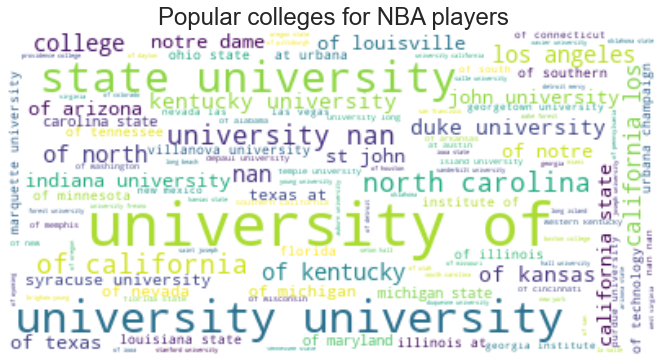

In [90]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})

wordcloud = WordCloud(background_color="white").generate(college_DAA)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.title('Popular colleges for NBA players',size=24)
plt.show()

# Neural network for predicting Points per game of the player

In [91]:
# TO BE COMPLETED